# FLIP (00): Data Science 
**(Module 04: Probability Theory)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---

## Session 1  Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

0.994122660865
0.993262053001
0.000860607864433


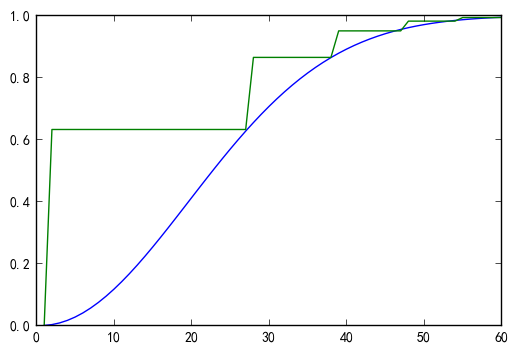

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt

# d = 365, n = 1, ..., 60
def p_a(d, n):
    v  = 1.0
    for i in range(n):
        v = v * (d - i) / d
    return 1 - v

def p_b(d, n):
    v = math.exp(-n * (n - 1) / (2 * d))
    return 1 - v

d = 365
n = 60
x = range(1, n + 1) # 1, 2, ..., n
y = [p_a(d, i) for i in x]
z = [p_b(d, i) for i in x]

print(p_a(d, n))
print(p_b(d, n))
print(p_a(d, n) - p_b(d, n))

plt.plot(x, y)
plt.plot(x, z)


**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

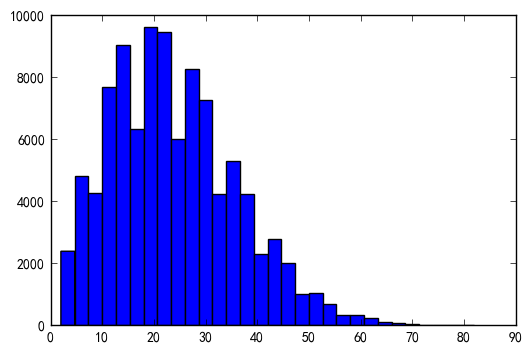

Wall time: 3.65 s


In [2]:
%%time
%matplotlib inline
import math
import random
import matplotlib.pyplot as plt
import numpy as np

def ran_dates(v, tab):
    tab = [0 for i in range(0, v + 1)]
    i = 1
    while i < 10000:
        value = random.randint(1, v)
        tab[i] = value
        if tab[value] > 1:
            return i
        i = i + 1
    return 10000

v = 365
tab = [0 for i in range(0, v + 1)]
tab2 = [ran_dates(v, tab) for i in range(100000)]

plt.hist(tab2, bins=30)
plt.show()


**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

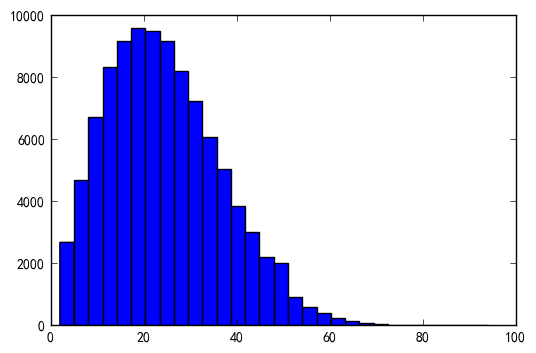

Wall time: 7.13 s


In [3]:
%%time
%matplotlib inline
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import bisect

stats = np.loadtxt('birthday_us_births_69_88.csv', skiprows = 1, delimiter=',', dtype = int)
for i in range(1, len(stats)):
    stats[i][2] = stats[i][2] + stats[i - 1][2]

sum = stats[-1][2]

def ran_dates(v, tab):
    tab = [0 for i in range(0, v + 1)]
    k = 1
    while k < 10000:
        p = random.uniform(0, 1)
        p = p * sum
        #szukamy pierwszego elementu co jest większy bądź równy p
        i = np.searchsorted(stats[:, 2], p)
        tab[i] = tab[i] + 1
        if tab[i] > 1:
            return k
        k = k + 1
    return 10000

v = len(stats)
tab = [0 for i in range(0, v + 1)]
tab2 = [ran_dates(v, tab) for i in range(100000)]

plt.hist(tab2, bins=30)
plt.show()
